# Wrangle and Analyze WeRateDogs Data 

In [42]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import requests 
import tweepy
import json
import zipfile
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

## Gathring 

In [43]:
# Open the csv file
tweet_data = pd.read_csv('twitter-archive-enhanced.csv')
tweet_data

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [ ]:
#create an API object code
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [44]:
#Extract the tweet-json zip file
with zipfile.ZipFile('tweet-json.zip' , 'r') as jsonzip:
    jsonzip.extractall()

In [45]:
#Change file name and type
json_file = 'tweet-json copy'
os.rename(json_file, 'tweet_json.txt')

In [46]:
#Extract more data from the json file 
json_data = []
TweetID = []
TweetRT = []
TweetFav = []
with open('tweet_json.txt', mode='r') as file:
    for line in file.readlines():
        TweetData = json.loads(line)
        TweetID = TweetData["id"]
        TweetRT = TweetData["retweet_count"]
        TweetFav = TweetData["favorite_count"]
        # Append to the columns and convert to a DataFrame 
        json_data.append({'Tweet_ID': TweetID,
                        'Tweet_RT': TweetRT,
                        'Tweet_Fav': TweetFav})
additional_tweet_data = pd.DataFrame(json_data, columns = ['Tweet_ID', 'Tweet_RT', 'Tweet_Fav'])
additional_tweet_data

        
        
        
    
    

Tweet_ID  Tweet_RT  Tweet_Fav
0     892420643555336193      8853      39467
1     892177421306343426      6514      33819
2     891815181378084864      4328      25461
3     891689557279858688      8964      42908
4     891327558926688256      9774      41048
...                  ...       ...        ...
2349  666049248165822465        41        111
2350  666044226329800704       147        311
2351  666033412701032449        47        128
2352  666029285002620928        48        132
2353  666020888022790149       532       2535

[2354 rows x 3 columns]

In [47]:
# Download the image prediction file using the link provided to Udacity students
image_predictions_url = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [48]:
response = requests.get(image_predictions_url)
with open(os.path.join(os.getcwd(),
                       image_predictions_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [49]:
# Open the tsv file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

## Assesing

### Visual Assessment 

In [51]:
# Showing the data 
tweet_data.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [52]:
# Showing the data 
tweet_data.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1248  711363825979756544                    NaN                  NaN   
1962  673355879178194945                    NaN                  NaN   
2163  669375718304980992                    NaN                  NaN   
1646  683834909291606017                    NaN                  NaN   
2189  668967877119254528           6.689207e+17           21435658.0   

                      timestamp  \
1248  2016-03-20 01:28:47 +0000   
1962  2015-12-06 04:18:46 +0000   
2163  2015-11-25 04:43:02 +0000   
1646  2016-01-04 02:18:42 +0000   
2189  2015-11-24 01:42:25 +0000   

                                                 source  \
1248  <a href="http://twitter.com/download/iphone" r...   
1962  <a href="http://twitter.com/download/iphone" r...   
2163  <a href="http://twitter.com/download/iphone" r...   
1646  <a href="http://twitter.com/download/iphone" r...   
2189  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1248  "Please, no puparazzi" 11/10 https://t.co/nJIX...                  NaN   
1962  This is Koda. She's a boss. Helps shift gears....                  NaN   
2163  This is Billl. He's trying to be a ghost but h...                  NaN   
1646  Here we see a faulty pupper. Might need to rep...                  NaN   
2189                     12/10 good shit Bubka\n@wane15                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1248                       NaN                        NaN   
1962                       NaN                        NaN   
2163                       NaN                        NaN   
1646                       NaN                        NaN   
2189                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1248  https://twitter.com/dog_rates/status/711363825...                11   
1962  https://twitter.com/dog_rates/status/673355879...                11   
2163  https://twitter.com/dog_rates/status/669375718...                 6   
1646  https://twitter.com/dog_rates/status/683834909...                 9   
2189                                                NaN                12   

      rating_denominator   name doggo floofer  pupper puppo  
1248                  10   None  None    None    None  None  
1962                  10   Koda  None    None    None  None  
2163                  10  Billl  None    None    None  None  
1646                  10   None  None    None  pupper  None  
2189                  10   None  None    None    None  None

In [53]:
# Showing the data 
tweet_data.tail(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [54]:
# Read descriptive data statistics
tweet_data.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [55]:
# Read dataset general information:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [56]:
# Showing the data 
additional_tweet_data.head(5)

Tweet_ID  Tweet_RT  Tweet_Fav
0  892420643555336193      8853      39467
1  892177421306343426      6514      33819
2  891815181378084864      4328      25461
3  891689557279858688      8964      42908
4  891327558926688256      9774      41048

In [57]:
# Showing the data 
additional_tweet_data.sample(5)

Tweet_ID  Tweet_RT  Tweet_Fav
982   749317047558017024      2509       6076
2230  668221241640230912       215        537
1985  672877615439593473       405       1096
1152  725458796924002305       703       1541
1703  680836378243002368      1513       3766

In [58]:
# Showing the data 
additional_tweet_data.tail(5)

Tweet_ID  Tweet_RT  Tweet_Fav
2349  666049248165822465        41        111
2350  666044226329800704       147        311
2351  666033412701032449        47        128
2352  666029285002620928        48        132
2353  666020888022790149       532       2535

In [59]:
# Read dataset general information:
additional_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Tweet_ID   2354 non-null   int64
 1   Tweet_RT   2354 non-null   int64
 2   Tweet_Fav  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [60]:
# Read descriptive data statistics
additional_tweet_data.describe()

Tweet_ID      Tweet_RT      Tweet_Fav
count  2.354000e+03   2354.000000    2354.000000
mean   7.426978e+17   3164.797366    8080.968564
std    6.852812e+16   5284.770364   11814.771334
min    6.660209e+17      0.000000       0.000000
25%    6.783975e+17    624.500000    1415.000000
50%    7.194596e+17   1473.500000    3603.500000
75%    7.993058e+17   3652.000000   10122.250000
max    8.924206e+17  79515.000000  132810.000000

In [61]:
# Showing the data 
image_predictions.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [62]:
# Showing the data 
image_predictions.sample(5)

tweet_id                                          jpg_url  \
1237  746790600704425984  https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg   
994   708130923141795840  https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg   
403   673700254269775872  https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg   
269   670815497391357952  https://pbs.twimg.com/media/CU83IZ8W4AEIh4y.jpg   
1790  830097400375152640  https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg   

      img_num                              p1   p1_conf  p1_dog  \
1237        3                     Boston_bull  0.936183    True   
994         1                  French_bulldog  0.710354    True   
403         1                    water_bottle  0.614536   False   
269         1  American_Staffordshire_terrier  0.919714    True   
1790        4                      toy_poodle  0.442713    True   

                             p2   p2_conf  p2_dog            p3   p3_conf  \
1237                 guinea_pig  0.010084   False      Cardigan  0.010077   
994                   Chihuahua  0.262302    True      Cardigan  0.006904   
403                      ashcan  0.050911   False        bucket  0.037432   
269   Staffordshire_bullterrier  0.073430    True  bull_mastiff  0.000906   
1790                 Pomeranian  0.142073    True      Pekinese  0.125745   

      p3_dog  
1237    True  
994     True  
403    False  
269     True  
1790    True

In [63]:
# Showing the data 
image_predictions.tail(5)

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [64]:
# Read dataset general information:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
# Read descriptive data statistics
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

### Programmatic Assessment 

In [66]:
# Check all records with missing expanded urls
tweet_data[tweet_data['expanded_urls'].isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [67]:
# Check duplicated records
tweet_data[tweet_data['tweet_id'].duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [68]:
# Check rating deminator graeter than 10
tweet_data[tweet_data['rating_denominator'] > 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   

                      timestamp  \
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   

                                                 source  \
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
342            @docmisterio account started on 11/15/15                  NaN   
433   The floofs have been released I repeat the flo...                  NaN   
784   RT @dog_rates: After so many requests, this is...         7.403732e+17   
902   Why does this never happen at my front door......                  NaN   
1068  After so many requests, this is Bretagne. She ...                  NaN   
1120  Say hello to this unbelievably well behav

In [69]:
# Check rating deminator less than 10
tweet_data[tweet_data['rating_denominator'] < 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17           26259576.0   
516   810984652412424192                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
516   2016-12-19 23:06:23 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
313   @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                  NaN   
2335  This is an Albanian 3 1/2 legged  Episcopalian...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
313                        NaN                        NaN   
516                        NaN                        NaN   
2335                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
313                                                 NaN               960   
516   https://www.gofundme.com/sams-smile,https://tw...                24   
2335  https://twitter.com/dog_rates/status/666287406...                 1   

      rating_denominator  name doggo floofer pupper puppo  
313                    0  None  None    None   None  None  
516                    7   Sam  None    None   None  None  
2335                   2    an  None    None   None  None

In [70]:
# Check rating numerator less than 10
tweet_data[tweet_data['rating_numerator'] < 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
45    883482846933004288                    NaN                  NaN   
229   848212111729840128                    NaN                  NaN   
315   835152434251116546                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
462   817502432452313088                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
45    2017-07-08 00:28:19 +0000   
229   2017-04-01 16:35:01 +0000   
315   2017-02-24 15:40:31 +0000   
387   2017-02-01 01:11:25 +0000   
462   2017-01-06 22:45:43 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
45    <a href="http://twitter.com/download/iphone" r...   
229   <a href="http://twitter.com/download/iphone" r...   
315   <a href="http://twitter.com/download/iphone" r...   
387   <a href="http://twitter.com/download/iphone" r...   
462   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
45    This is Bella. She hopes her smile made you sm...                  NaN   
229   This is Jerry. He's doing a distinguished tong...                  NaN   
315   When you're so blinded by your systematic plag...                  NaN   
387   I was going to do 007/10, but the joke wasn't ...                  NaN   
462   RT @dog_rates: Meet Herschel. He's slightly bi...         6.924173e+17   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
45                         NaN                        NaN   
229                        NaN                        NaN   
315                        NaN                        NaN   
387                        NaN                        NaN   
462               4.196984e+09  2016-01-27 18:42:06 +0000   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
45    https://twitter.com/dog_rates/status/883482846...                 5   
229   https://twitter.com/dog_rates/status/848212111...                 6   
315   https://twitter.com/dog_rates/status/835152434...                 0   
387                

In [71]:
# Check records with no dog name
tweet_data[tweet_data['name'] == 'None']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
...                  ...                    ...                  ...   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2351  666049248165822465                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
5     2017-07-29 00:08:17 +0000   
7     2017-07-28 00:22:40 +0000   
12    2017-07-25 01:55:32 +0000   
24    2017-07-18 16:08:03 +0000   
25    2017-07-18 00:07:08 +0000   
...                         ...   
2342  2015-11-16 02:38:37 +0000   
2343  2015-11-16 01:59:36 +0000   
2344  2015-11-16 01:52:02 +0000   
2351  2015-11-16 00:24:50 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
5     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
24    <a href="http://twitter.com/download/iphone" r...   
25    <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2342  <a href="http://twitter.com/download/iphone" r...   
2343  <a href="http://twitter.com/download/iphone" r...   
2344  <a href="http://twitter.com/download/iphone" r...   
2351  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
5     Here we have a majestic great white breaching ...                  NaN   
7     When you watch your owner call another dog a g...                  NaN   
12    Here's a puppo that seems to be on the fence a...                  NaN   
24    You may not have known you needed to see this ...                  NaN   
25    This... is a Jubilant Antarctic House Bear. We...                  NaN   
...                                                 ...                  ...   
2342  Here we have a well-established sunblockerspan...                  NaN   
2343  Let's hope this flight isn't Malaysian (lol). ...                  NaN   
2344  Here we have a northern speckled Rhododendron....                  NaN   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
5                          NaN                        NaN   
7                          NaN                        NaN   
12                         NaN                        NaN   
24                         NaN                        NaN   
25                         NaN                        NaN   
...                        ...                        ...   
2342                       NaN                        NaN   
2343                       NaN                        NaN   
2344                       NaN                        NaN   
2351                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
5     https://twitter.com/dog_rates/status/891087950...                13   
7     https://twitter.com/dog_rates/status/890729181...                13   
12    https://twitter.com/dog_rates/status/889665388...                13   
24    https://twitt

In [72]:
# Create a loop that extract the missing records from additional tweet data dataset 
i=0;
j=0;
missing_records = []
for i in range(tweet_data.shape[0]):
    for j in range(additional_tweet_data.shape[0]):
        if tweet_data['tweet_id'].loc[i] == additional_tweet_data['Tweet_ID'].loc[j]:
            missing_records += [additional_tweet_data['Tweet_ID'].loc[j]]
            break
        elif j==additional_tweet_data.shape[0]-1:
            missing_records += ["missing record"]
            break
        else:
            j=j+1
    j=0;        
    k=k+1


        
        
        

In [73]:
# Save the array into a dataframe
missing_records=pd.DataFrame(missing_records)

In [74]:
# Show the missing records index
missing_records[missing_records[0] == 'missing record']

0
19   missing record
815  missing record

In [75]:
# Show the missing record with index 19
tweet_data[tweet_data['tweet_id'].index == 19]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19  888202515573088257                    NaN                  NaN   

                    timestamp  \
19  2017-07-21 01:02:36 +0000   

                                               source  \
19  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
19  RT @dog_rates: This is Canela. She attempted s...         8.874740e+17   

    retweeted_status_user_id retweeted_status_timestamp  \
19              4.196984e+09  2017-07-19 00:47:34 +0000   

                                        expanded_urls  rating_numerator  \
19  https://twitter.com/dog_rates/status/887473957...                13   

    rating_denominator    name doggo floofer pupper puppo  
19                  10  Canela  None    None   None  None

In [76]:
# Show the missing record with index 815
tweet_data[tweet_data['tweet_id'].index == 815]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
815  771004394259247104                    NaN                  NaN   

                     timestamp  \
815  2016-08-31 15:19:06 +0000   

                                                source  \
815  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
815  RT @katieornah: @dog_rates learning a lot at c...         7.710021e+17   

     retweeted_status_user_id retweeted_status_timestamp  \
815              1.732729e+09  2016-08-31 15:10:07 +0000   

                                         expanded_urls  rating_numerator  \
815  https://twitter.com/katieornah/status/77100213...                12   

     rating_denominator  name doggo floofer  pupper puppo  
815                  10  None  None    None  pupper  None

In [77]:
# Caalculate number of duplicted jpg url
sum(image_predictions['jpg_url'].duplicated())

66

In [78]:
# Check if the record is missing 
additional_tweet_data[additional_tweet_data['Tweet_ID'] == 771004394259247104]

Empty DataFrame
Columns: [Tweet_ID, Tweet_RT, Tweet_Fav]
Index: []

In [79]:
# Check if the record is missing 
additional_tweet_data[additional_tweet_data['Tweet_ID'] == 888202515573088257]

Empty DataFrame
Columns: [Tweet_ID, Tweet_RT, Tweet_Fav]
Index: []

### Quality 


tweet_data table

1. Missing "in_reply_to_status_id" , "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id",
"retweeted_status_timestamp" and "expanded_urls"
2. "tweet_id" is an integer not a string
   "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", and "retweeted_status_user_id" are float not string
   "timestamp" is a string not a date 
3. Some values of "rating_denominator" are not equal to 10 
4. some values of "rating_numerator" are less than 10 
5. Some values of "name" are (None)
6. Some record are not original rating from the WeRateDogs account 


additional_tweet_data table

1. "Tweet_ID" is integer not string 
2. Missing records (2354 instead of 2356) (Id 19 and ID 815)
3. Column names is not consistent with other tables 

image_predictions table 

1. Missing records (2075 instead of 2356) 
2. "tweet_id" is integer not string 
3. Variables "p1", "p2", and "p3" are string data type not category data type
4. There are 66 duplicated records  with the same dog picture







   
   


### Tidiness 

1. The columns "doggo", "floofer", "pupper", and "puppo" are the possible values for only one varible 
2. All the three tables are representing one observational unit

## Cleaning

In [80]:
# Make a copy of the tables before cleaning
tweet_data_clean = tweet_data.copy()
additional_tweet_data_clean = additional_tweet_data.copy()
image_predictions_clean = image_predictions.copy()


#### Missing Data

additional_tweet_data: Missing records (2354 instead of 2356) (Id 19 and ID 815) 





##### Define
Drop the rows with index 19 and index 815 from the dataset

##### Code

In [81]:
# Drop record with index 19
tweet_data_clean = tweet_data_clean.drop(tweet_data_clean.index[19])


In [82]:
# Drop record with index 815
tweet_data_clean = tweet_data_clean.drop(tweet_data_clean.index[815])


##### Test

In [83]:
# Read dataset general information:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

#### Tidiness

1) The columns "doggo", "floofer", "pupper", and "puppo" are the possible values for only one variable

##### Define
Melt the "doggo", "floofer", "pupper" and "puppo" into one column  

##### Code

In [84]:
# Save all the tweet ids before editing 
tweet_ids = tweet_data_clean.tweet_id.tolist()

In [85]:
len(tweet_ids)

2354

In [86]:
# Melt the varibles into one coulmn
tweet_data_clean = pd.melt(tweet_data_clean, id_vars =['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source', 'text','retweeted_status_id','retweeted_status_user_id', 'rating_numerator',
                                                          'retweeted_status_timestamp','expanded_urls','rating_denominator','name'],
                var_name = 'type_toberemoved', value_name = 'type')
tweet_data_clean.head(2)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id  rating_numerator retweeted_status_timestamp  \
0                       NaN                13                        NaN   
1                       NaN                13                        NaN   

                                       expanded_urls  rating_denominator  \
0  https://twitter.com/dog_rates/status/892420643...                  10   
1  https://twitter.com/dog_rates/status/892177421...                  10   

      name type_toberemoved  type  
0  Phineas            doggo  None  
1    Tilly            doggo  None

In [87]:
tweet_data_clean = tweet_data_clean.drop('type_toberemoved',axis=1)

In [88]:
# Show the data
tweet_data_clean.head(50)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888078434458587136                    NaN                  NaN   
20  887705289381826560                    NaN                  NaN   
21  887517139158093824                    NaN                  NaN   
22  887473957103951883                    NaN                  NaN   
23  887343217045368832                    NaN                  NaN   
24  887101392804085760                    NaN                  NaN   
25  886983233522544640                    NaN                  NaN   
26  886736880519319552                    NaN                  NaN   
27  886680336477933568                    NaN                  NaN   
28  886366144734445568                    NaN                  NaN   
29  886267009285017600           8.862664e+17         2.281182e+09   
30  886258384151887873                    NaN                  NaN   
31  886054160059072513                    NaN                  NaN   
32  885984800019947520                    NaN                  NaN   
33  885528943205470208                    NaN                  NaN   
34  885518971528720385                    NaN                  NaN   
35  885311592912609280                    NaN                  NaN   
36  885167619883638784                    NaN                  NaN   
37  884925521741709313                    NaN                  NaN   
38  884876753390489601                    NaN                  NaN   
39  884562892145688576                    NaN                  NaN   
40  884441805382717440                    NaN                  NaN   
41  884247878851493888                    NaN                  NaN   
42  884162670584377345                    NaN                  NaN   
43  883838122936631299                    NaN                  NaN   
44  883482846933004288                    NaN                  NaN   
45  883360690899218434                    NaN                  NaN   
46  883117836046086144                    NaN                  NaN   
47  882992080364220416                    NaN                  NaN   
48  882762694511734784                    NaN                  NaN   
49  882627270321602560                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25

In [89]:
# Read dataset general information:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9416 entries, 0 to 9415
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9416 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9416 non-null   object 
 4   source                      9416 non-null   object 
 5   text                        9416 non-null   object 
 6   retweeted_status_id         720 non-null    float64
 7   retweeted_status_user_id    720 non-null    float64
 8   rating_numerator            9416 non-null   int64  
 9   retweeted_status_timestamp  720 non-null    object 
 10  expanded_urls               9180 non-null   object 
 11  rating_denominator          9416 non-null   int64  
 12  name                        9416 non-null   object 
 13  type                        9416 

In [90]:

for idx, twtid in enumerate(tweet_ids):
    dog_tweets = tweet_data_clean[tweet_data_clean.tweet_id == twtid]
 # if a tweet has any type values is not 'None', set the first one to whatever values it is and drop the rest    
    if dog_tweets.type.values.tolist()[0] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_data_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_data_clean = tweet_data_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis=0)
        continue 
        
    if dog_tweets.type.values.tolist()[1] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_data_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_data_clean = tweet_data_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis=0)
        continue 
    
    if dog_tweets.type.values.tolist()[2] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_data_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_data_clean = tweet_data_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis=0)
        continue 
        
    if dog_tweets.type.values.tolist()[3] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_data_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_data_clean = tweet_data_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis=0)
        continue 
        
    else:
        tweet_data_clean = tweet_data_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis=0)

##### Test

In [91]:
# Read dataset general information:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   rating_numerator            2354 non-null   int64  
 9   retweeted_status_timestamp  180 non-null    object 
 10  expanded_urls               2295 non-null   object 
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  type                        2354 

In [92]:
# Count each type 
tweet_data_clean.type.value_counts()

None             1974
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: type, dtype: int64

2) All the three tables are representing one observational unit

##### Define
Marge the three tables "tweet_data", "additional_tweet_data_clean", and "image_predictions_clean" into one table 

In [93]:
# Rename the coulmns 
additional_tweet_data = additional_tweet_data.rename(columns={"Tweet_ID": "tweet_id", "Tweet_RT":"tweet_rt","Tweet_Fav":"tweet_fav"})

##### Code

In [94]:
# Marge the tweet data clean table with additional tweet data table
tweet_data_clean = pd.merge(tweet_data_clean, additional_tweet_data, on = ['tweet_id'], how='inner'  )

In [95]:
# Marge the tweet data clean table with imag predictions teble
tweet_data_clean = pd.merge(tweet_data_clean, image_predictions, on = ['tweet_id'], how='inner'  )

##### Test

In [96]:
# Show the data
tweet_data_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id  rating_numerator retweeted_status_timestamp  ...  \
0                       NaN                13                        NaN  ...   
1                       NaN                13                        NaN  ...   
2                       NaN                12                        NaN  ...   
3                       NaN                13                        NaN  ...   
4                       NaN                12                        NaN  ...   

  img_num           p1   p1_conf p1_dog                  p2   p2_conf p2_dog  \
0       1       orange  0.097049  False               bagel  0.085851  False   
1       1    Chihuahua  0.323581   True            Pekinese  0.090647   True   
2       1    Chihuahua  0.716012   True            malamute  0.078253   True   
3       1  paper_towel  0.170278  False  Labrador_retriever  0.168086   True   
4       2       basset  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1                     papillon  0.068957    True  
2                       kelpie  0.031379    True  
3                      spatula  0.040836   False  
4  German_short-haired_pointer  0.175219    True  

[5 rows x 27 columns]

In [97]:
# Read dataset general information:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2071
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2072 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2072 non-null   object 
 4   source                      2072 non-null   object 
 5   text                        2072 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   rating_numerator            2072 non-null   int64  
 9   retweeted_status_timestamp  79 non-null     object 
 10  expanded_urls               2072 non-null   object 
 11  rating_denominator          2072 non-null   int64  
 12  name                        2072 non-null   object 
 13  type                        2072 

### Quality

1) Some records are not original rating from the WeRateDogs account 

##### Define
Drop all the recored that is not from the original rating by drop any record that inculde in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, or retweeted_status_user_id

##### Code

In [98]:
# Take the record that is only do not have in reply to status id or retweeted status id 
tweet_data_clean =tweet_data_clean[tweet_data_clean.in_reply_to_status_id.isnull()]

tweet_data_clean =tweet_data_clean[tweet_data_clean.retweeted_status_id.isnull()]


##### Test

In [99]:
# Read dataset general information:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2071
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1970 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1970 non-null   object 
 4   source                      1970 non-null   object 
 5   text                        1970 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   rating_numerator            1970 non-null   int64  
 9   retweeted_status_timestamp  0 non-null      object 
 10  expanded_urls               1970 non-null   object 
 11  rating_denominator          1970 non-null   int64  
 12  name                        1970 non-null   object 
 13  type                        1970 

2) "in_reply_to_status_id" , "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id",
"retweeted_status_timestamp" and "expanded_urls" columns are empty 

##### Define
Drop useless columns ("in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" in the dataset which are not helpful in our analysis and are null  

##### Code

In [100]:
# Drop the columns
tweet_data_clean = tweet_data_clean.drop(labels = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                                  'retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

##### Test

In [101]:
# Read dataset general information:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2071
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1970 non-null   int64  
 1   timestamp           1970 non-null   object 
 2   source              1970 non-null   object 
 3   text                1970 non-null   object 
 4   rating_numerator    1970 non-null   int64  
 5   expanded_urls       1970 non-null   object 
 6   rating_denominator  1970 non-null   int64  
 7   name                1970 non-null   object 
 8   type                1970 non-null   object 
 9   tweet_rt            1970 non-null   int64  
 10  tweet_fav           1970 non-null   int64  
 11  jpg_url             1970 non-null   object 
 12  img_num             1970 non-null   int64  
 13  p1                  1970 non-null   object 
 14  p1_conf             1970 non-null   float64
 15  p1_dog              1970 non-null   bool   
 16  p2    

3)  "tweet_id" is an integer not a string, "timestamp" is a string not a date, and the variables "p1", "p2", and "p3" are string 
not category data type

##### Define
Change "tweet_id" type from integer to string, "timestamp" type from string to date, and "p1", "p2", "p3" from string to category

##### Code

In [102]:
# Change data type
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype('str')
tweet_data_clean['timestamp'] = pd.to_datetime(tweet_data_clean['timestamp'])
tweet_data_clean['p1'] = tweet_data_clean['p1'].astype('category')
tweet_data_clean['p2'] = tweet_data_clean['p2'].astype('category')
tweet_data_clean['p3'] = tweet_data_clean['p3'].astype('category')


##### Test

In [103]:
# Read dataset general information:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2071
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1970 non-null   object             
 1   timestamp           1970 non-null   datetime64[ns, UTC]
 2   source              1970 non-null   object             
 3   text                1970 non-null   object             
 4   rating_numerator    1970 non-null   int64              
 5   expanded_urls       1970 non-null   object             
 6   rating_denominator  1970 non-null   int64              
 7   name                1970 non-null   object             
 8   type                1970 non-null   object             
 9   tweet_rt            1970 non-null   int64              
 10  tweet_fav           1970 non-null   int64              
 11  jpg_url             1970 non-null   object             
 12  img_num             1970 non-null 

4)Some values of "rating_denominator" are not equal to 10

##### Define
change any value of "rating_denominator" greater or less than 10 to 10 

##### Code

In [104]:
# Change all values of rating denominator to 10 
tweet_data_clean = tweet_data_clean.reset_index()
k=0;
for k in range(tweet_data_clean.shape[0]):
    if  tweet_data_clean['rating_denominator'].loc[k] == 10:
        k=k+1
    else:
        tweet_data_clean['rating_denominator'].loc[k] = 10
        k=k+1

C:\Users\amnah\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


##### Test

In [105]:
#Count number of values equal to 10
tweet_data_clean['rating_denominator'].value_counts()

10    1970
Name: rating_denominator, dtype: int64

5)Some records includes invalids dogs names (None, a, an)

##### Define
Use a regex expression to extract the correct names of the dogs, and if there is no name in the tweet show None. 

##### Code

In [106]:
# Create a loop
invalid_names = []
for idx, name in enumerate(tweet_data_clean.name):
    # We want only to investigate records that have small letter or without any name 
    if name.islower() or name == 'None':
        j= re.compile('(?:named\s|name\sis\s)(\wt)')
        if j.findall(tweet_data_clean.loc[idx,'text']):
            tweet_data_clean.loc[odx,'name']=j.findall(tweet_data_clean.loc[idx,'text'])[0]
            # if not make it none
        else:
            tweet_data_clean.loc[idx,'name'] = 'None'

##### Test

In [107]:
#Count dog names values
tweet_data_clean.name.value_counts()

None       622
Charlie     11
Oliver      10
Cooper      10
Lucy        10
          ... 
Herb         1
Arnold       1
Jareld       1
Covach       1
Duchess      1
Name: name, Length: 913, dtype: int64

6) Inaccurate ratings for tweets that contain a decimal

##### Define
Extract the correct rating from the tweet and replace the wrong ones

##### Code

In [108]:
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in tweet_data_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

ratings_with_decimals_index

[39, 499, 549, 1358]

In [109]:
#Correctly converting the above decimal ratings to float
tweet_data_clean.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
tweet_data_clean.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
tweet_data_clean.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
tweet_data_clean.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

##### Test

In [110]:
# Check record 39
tweet_data_clean.loc[39]

index                                                                40
tweet_id                                             883482846933004288
timestamp                                     2017-07-08 00:28:19+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Bella. She hopes her smile made you sm...
rating_numerator                                                   13.5
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_denominator                                                   10
name                                                              Bella
type                                                               None
tweet_rt                                                          10407
tweet_fav                                                         46860
jpg_url                 https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                                                         

7)Lack of dog type column 

##### Define
Create new column that identify the dog type by keeping only the first true prediction 

##### Code

In [111]:

dog_type = []
confidence_list = []


def image(tweet_data_clean):
    if tweet_data_clean['p1_dog'] == True:
        dog_type.append(tweet_data_clean['p1'])
        confidence_list.append(tweet_data_clean['p1_conf'])
    elif tweet_data_clean['p2_dog'] == True:
        dog_type.append(tweet_data_clean['p2'])
        confidence_list.append(tweet_data_clean['p2_conf'])
    elif tweet_data_clean['p3_dog'] == True:
        dog_type.append(tweet_data_clean['p3'])
        confidence_list.append(tweet_data_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

      
tweet_data_clean.apply(image, axis=1)


tweet_data_clean['dog_type'] = dog_type
tweet_data_clean['confidence_list'] = confidence_list

##### Test

In [112]:
# Show the data
tweet_data_clean.head()

index            tweet_id                 timestamp  \
0      0  892420643555336193 2017-08-01 16:23:56+00:00   
1      1  892177421306343426 2017-08-01 00:17:27+00:00   
2      2  891815181378084864 2017-07-31 00:18:03+00:00   
3      3  891689557279858688 2017-07-30 15:58:51+00:00   
4      4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...              13.0   
1  This is Tilly. She's just checking pup on you....              13.0   
2  This is Archie. He is a rare Norwegian Pouncin...              12.0   
3  This is Darla. She commenced a snooze mid meal...              13.0   
4  This is Franklin. He would like you to stop ca...              12.0   

                                       expanded_urls  rating_denominator  \
0  https://twitter.com/dog_rates/status/892420643...                  10   
1  https://twitter.com/dog_rates/status/892177421...                  10   
2  https://twitter.com/dog_rates/status/891815181...                  10   
3  https://twitter.com/dog_rates/status/891689557...                  10   
4  https://twitter.com/dog_rates/status/891327558...                  10   

       name  type  ...   p1_conf  p1_dog                  p2   p2_conf p2_dog  \
0   Phineas  None  ...  0.097049   False               bagel  0.085851  False   
1     Tilly  None  ...  0.323581    True            Pekinese  0.090647   True   
2    Archie  None  ...  0.716012    True            malamute  0.078253   True   
3     Darla  None  ...  0.170278   False  Labrador_retriever  0.168086   True   
4  Franklin  None  ...  0.555712    True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog            dog_type  \
0                       banana  0.076110  False               Error   
1                     papillon  0.068957   True           Chihuahua   
2                       kelpie  0.031379   True           Chihuahua   
3                      spatula  0.040836  False  Labrador_retriever   
4  German_short-haired_pointer  0.175219   True              basset   

   confidence_list  
0            Error  
1         0.323581  
2         0.716012  
3         0.168086  
4         0.555712  

[5 rows x 25 columns]

8)Some records includes "Error" prediction

##### Define
Drop rows that has prediction_list 'error'

##### Code

In [113]:
#Take only records without dog type "error"
tweet_data_clean = tweet_data_clean[tweet_data_clean['dog_type'] != 'Error']

##### Test

In [114]:
# Show the data
tweet_data_clean.head()

index            tweet_id                 timestamp  \
1      1  892177421306343426 2017-08-01 00:17:27+00:00   
2      2  891815181378084864 2017-07-31 00:18:03+00:00   
3      3  891689557279858688 2017-07-30 15:58:51+00:00   
4      4  891327558926688256 2017-07-29 16:00:24+00:00   
5      5  891087950875897856 2017-07-29 00:08:17+00:00   

                                              source  \
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
1  This is Tilly. She's just checking pup on you....              13.0   
2  This is Archie. He is a rare Norwegian Pouncin...              12.0   
3  This is Darla. She commenced a snooze mid meal...              13.0   
4  This is Franklin. He would like you to stop ca...              12.0   
5  Here we have a majestic great white breaching ...              13.0   

                                       expanded_urls  rating_denominator  \
1  https://twitter.com/dog_rates/status/892177421...                  10   
2  https://twitter.com/dog_rates/status/891815181...                  10   
3  https://twitter.com/dog_rates/status/891689557...                  10   
4  https://twitter.com/dog_rates/status/891327558...                  10   
5  https://twitter.com/dog_rates/status/891087950...                  10   

       name  type  ...   p1_conf  p1_dog                  p2   p2_conf p2_dog  \
1     Tilly  None  ...  0.323581    True            Pekinese  0.090647   True   
2    Archie  None  ...  0.716012    True            malamute  0.078253   True   
3     Darla  None  ...  0.170278   False  Labrador_retriever  0.168086   True   
4  Franklin  None  ...  0.555712    True    English_springer  0.225770   True   
5      None  None  ...  0.425595    True       Irish_terrier  0.116317   True   

                            p3   p3_conf p3_dog                  dog_type  \
1                     papillon  0.068957   True                 Chihuahua   
2                       kelpie  0.031379   True                 Chihuahua   
3                      spatula  0.040836  False        Labrador_retriever   
4  German_short-haired_pointer  0.175219   True                    basset   
5              Indian_elephant  0.076902  False  Chesapeake_Bay_retriever   

   confidence_list  
1         0.323581  
2         0.716012  
3         0.168086  
4         0.555712  
5         0.425595  

[5 rows x 25 columns]

9)There are 66 dublicated recoreds with the same dog picture

##### Define
Drop all the duplicated records 

##### Code

In [115]:
# Drop duplicted records
tweet_data_clean = tweet_data_clean.drop_duplicates(subset=['jpg_url'], keep='last')

##### Test

In [116]:
# Check duplicated
sum(tweet_data_clean['jpg_url'].duplicated())

0

In [118]:
tweet_data_clean['rating_numerator'].value_counts()

12.00     421
10.00     357
11.00     352
13.00     221
9.00      132
8.00       68
7.00       32
14.00      21
6.00       16
5.00       13
4.00        7
3.00        5
2.00        2
24.00       1
11.27       1
13.50       1
165.00      1
0.00        1
11.26       1
84.00       1
144.00      1
9.75        1
1.00        1
88.00       1
99.00       1
50.00       1
80.00       1
45.00       1
60.00       1
44.00       1
121.00      1
Name: rating_numerator, dtype: int64

## Storing 

In [119]:
#Storing the new twitter_dogs df to a new csv file
tweet_data_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing

### Insight 1

In [120]:
#Create correition table
tweet_data_clean.corr()

index  rating_numerator  rating_denominator  tweet_rt  \
index               1.000000         -0.126077                 NaN -0.381539   
rating_numerator   -0.126077          1.000000                 NaN  0.059517   
rating_denominator       NaN               NaN                 NaN       NaN   
tweet_rt           -0.381539          0.059517                 NaN  1.000000   
tweet_fav          -0.596919          0.078295                 NaN  0.913279   
img_num            -0.220165          0.027185                 NaN  0.095048   
p1_conf            -0.117457          0.043135                 NaN  0.057865   
p1_dog             -0.051705          0.026730                 NaN -0.017418   
p2_conf             0.010209         -0.029747                 NaN -0.019711   
p2_dog             -0.052567          0.002322                 NaN -0.005064   
p3_conf             0.065729         -0.006043                 NaN -0.044775   
p3_dog             -0.020802          0.012552                 NaN -0.011712   

                    tweet_fav   img_num   p1_conf    p1_dog   p2_conf  \
index               -0.596919 -0.220165 -0.117457 -0.051705  0.010209   
rating_numerator     0.078295  0.027185  0.043135  0.026730 -0.029747   
rating_denominator        NaN       NaN       NaN       NaN       NaN   
tweet_rt             0.913279  0.095048  0.057865 -0.017418 -0.019711   
tweet_fav            1.000000  0.126389  0.082679  0.009467 -0.022023   
img_num              0.126389  1.000000  0.214130 -0.007912 -0.174135   
p1_conf              0.082679  0.214130  1.000000  0.092091 -0.541380   
p1_dog               0.009467 -0.007912  0.092091  1.000000  0.099283   
p2_conf             -0.022023 -0.174135 -0.541380  0.099283  1.000000   
p2_dog               0.018747  0.029503  0.118711  0.217482  0.078106   
p3_conf             -0.055203 -0.142378 -0.732048  0.018539  0.478980   
p3_dog              -0.006513  0.034226  0.080124  0.112552  0.029004   

                      p2_dog   p3_conf    p3_dog  
index              -0.052567  0.065729 -0.020802  
rating_numerator    0.002322 -0.006043  0.012552  
rating_denominator       NaN       NaN       NaN  
tweet_rt           -0.005064 -0.044775 -0.011712  
tweet_fav           0.018747 -0.055203 -0.006513  
img_num             0.029503 -0.142378  0.034226  
p1_conf             0.118711 -0.732048  0.080124  
p1_dog              0.217482  0.018539  0.112552  
p2_conf             0.078106  0.478980  0.029004  
p2_dog              1.000000 -0.009390  0.086236  
p3_conf            -0.009390  1.000000 -0.001515  
p3_dog              0.086236 -0.001515  1.000000

In [121]:
# Create correltion matrix
corrMatrix = tweet_data_clean.corr()

In [122]:
# Plot correlation matrix
plt.figure(figsize=(20,10))

sns.heatmap(corrMatrix, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


Note: The above correlation matrix shows the following relations:
1. The relation between tweet_fav variable and tweet_rt variable is positive strong relationship (0.9)
2. Rating denominator is a constant value that does not change according to any other variable 
3. The relation between index variable and tweet_fav variable is a strong negative relationship (-0.6)


### Insight 2

C:\Users\amnah\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(-15.075000000000003, 0.5, 'Favorite Count')

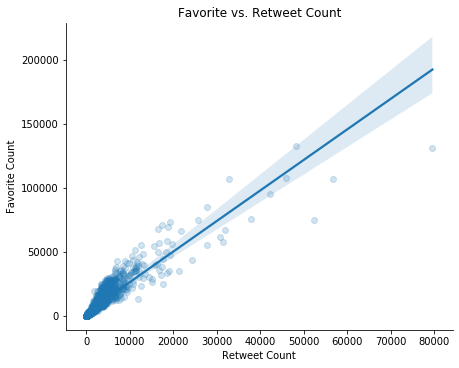

In [123]:
# Plotting time vs. tweets
sns.lmplot(x="tweet_rt", 
           y="tweet_fav", 
           data=tweet_data_clean,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

Note: As shown in the above figure, as the number of favorites of a dog picture increases the number of retweet increase also

### Insight 3

In [124]:
# Histogram to visualize dog breeeds
df_dog_type = tweet_data_clean.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

Note: As shown in the above figure, the most popular dog type is Golden retriever and then Labrador retriever and then Pembroke. On the other hand, the Cocker spaniel type is the lowest.

## Sources
1] https://github.com/chelseymarie6/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
2] https://github.com/latinacode/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
3] https://github.com/ursulahneumann/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
4] https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/#:~:text=Pandas%20drop%20function%20can%20drop,another%20argument%20to%20drop%20function.&text=The%20resulting%20dataframe%20will%20have,pop%20variable%20is%20removed%20now.
5] https://stackoverflow.com/questions/53961914/create-a-dataframe-from-arrays-python
6] https://www.programiz.com/python-programming/if-elif-else
7] https://www.geeksforgeeks.org/os-module-python-examples/#:~:text=The%20OS%20module%20in%20python,using%20operating%20system%20dependent%20functionality.
8] https://www.w3schools.com/python/python_json.asp
9] https://www.tutorialspoint.com/How-to-change-file-extension-in-Python#:~:text=When%20changing%20the%20extension%2C%20you,the%20new%20extension%20you%20want.
10] https://stackoverflow.com/questions/187455/counting-array-elements-in-python
